In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r'C:\Users\IRINNISAR\Downloads\Amazon Stock Price\AAL_data.csv', date_parser = True)
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


In [9]:
training_set = data[data['date']<'2016-01-01'].copy()
test_set = data[data['date']>='2016-01-01'].copy()

In [10]:
training_set = training_set.iloc[:,1:2].values
test_set = test_set.iloc[:,1:2].values

In [11]:
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
training_set

array([[0.0451462 ],
       [0.04093567],
       [0.03064327],
       [0.0271345 ],
       [0.04210526],
       [0.01847953],
       [0.02783626],
       [0.02409357],
       [0.01122807],
       [0.01005848],
       [0.01076023],
       [0.        ],
       [0.00327485],
       [0.00818713],
       [0.00538012],
       [0.00842105],
       [0.02035088],
       [0.0322807 ],
       [0.03649123],
       [0.04327485],
       [0.04      ],
       [0.04678363],
       [0.05614035],
       [0.06643275],
       [0.0774269 ],
       [0.06222222],
       [0.07812865],
       [0.09333333],
       [0.09520468],
       [0.09263158],
       [0.08842105],
       [0.0825731 ],
       [0.07812865],
       [0.0902924 ],
       [0.09076023],
       [0.07812865],
       [0.06269006],
       [0.04631579],
       [0.04748538],
       [0.06269006],
       [0.06853801],
       [0.06081871],
       [0.06152047],
       [0.06947368],
       [0.07157895],
       [0.06596491],
       [0.07087719],
       [0.079

In [12]:
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
    X_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((670, 60), (670,))

In [13]:
# reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))  #shape disesuaikan dg yg diminta lstm (samples, timestep, feature input)
X_train.shape

(670, 60, 1)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [15]:
regressior = Sequential()

regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 50, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
regressior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
__________

In [18]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [19]:
regressior.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
670/670 [==============================] - 10s 15ms/sample - loss: 0.1639
Epoch 2/100
670/670 [==============================] - 4s 7ms/sample - loss: 0.0274
Epoch 3/100
670/670 [==============================] - 5s 7ms/sample - loss: 0.0176
Epoch 4/100
670/670 [==============================] - 5s 8ms/sample - loss: 0.0119
Epoch 5/100
670/670 [==============================] - 5s 8ms/sample - loss: 0.0115
Epoch 6/100
670/670 [==============================] - 5s 7ms/sample - loss: 0.0106
Epoch 7/100
670/670 [==============================] - 4s 7ms/sample - loss: 0.0097
Epoch 8/100
670/670 [==============================] - 5s 7ms/sample - loss: 0.0098
Epoch 9/100
670/670 [==============================] - 5s 7ms/sample - loss: 0.0087
Epoch 10/100
670/670 [==============================] - 5s 7ms/sample - loss: 0.0097
Epoch 11/100
670/670 [==============================] - 5s 7ms/sample - loss: 0.0095
Epoch 12/100
670/670 [==

670/670 [==============================] - 4s 6ms/sample - loss: 0.0044
Epoch 95/100
670/670 [==============================] - 4s 6ms/sample - loss: 0.0043
Epoch 96/100
670/670 [==============================] - 4s 6ms/sample - loss: 0.0041
Epoch 97/100
670/670 [==============================] - 4s 6ms/sample - loss: 0.0041
Epoch 98/100
670/670 [==============================] - 4s 6ms/sample - loss: 0.0036
Epoch 99/100
670/670 [==============================] - 4s 6ms/sample - loss: 0.0048
Epoch 100/100
670/670 [==============================] - 4s 6ms/sample - loss: 0.0036


In [24]:
dataset_total = pd.concat((data[data['date']<'2016-01-01']['open'], data[data['date']>='2016-01-01']['open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [25]:
X_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test.shape

(529, 60)

In [27]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(529, 60, 1)

In [28]:
y_pred = regressior.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

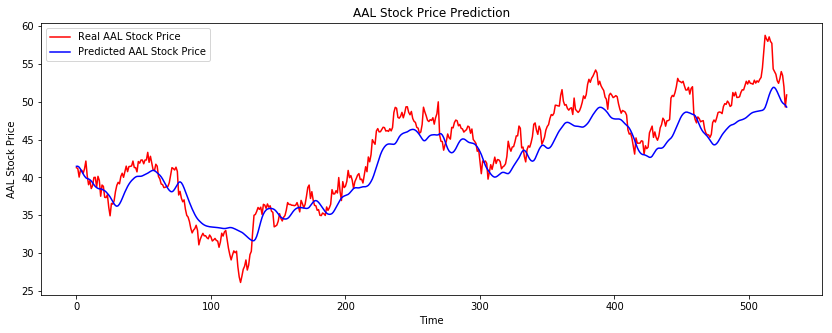

In [31]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(test_set, color = 'red', label = 'Real AAL Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted AAL Stock Price')
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()

In [30]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, y_pred))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 2.69882771042864.
